In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [23]:
data1=pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


#### EDA

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [25]:
data1[data1.duplicated(keep=False)]

,Newspaper,daily,sunday


In [26]:
data1.drop_duplicates(keep='first',inplace=True)
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [27]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

<Axes: >

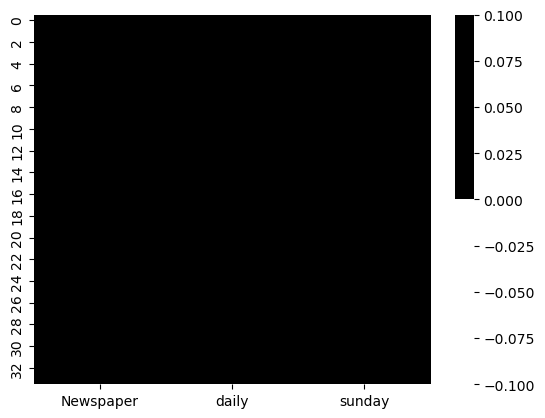

In [28]:
cols=data1.columns
colors=['white','black']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [29]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


<Axes: >

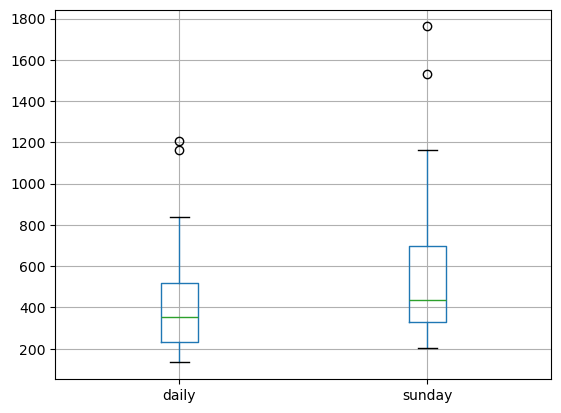

In [30]:
data1.boxplot()

Text(0, 0.5, 'Frequency')

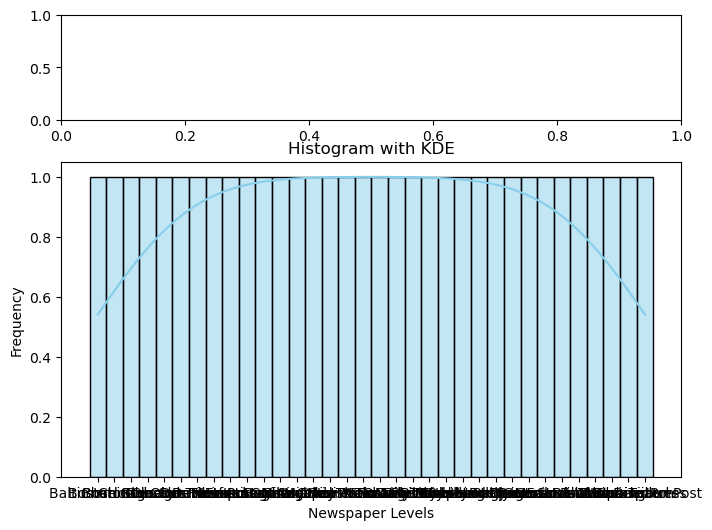

In [31]:
fig,axes=plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})

sns.histplot(data1["Newspaper"],kde=True,ax=axes[1],color='skyblue',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Newspaper Levels")
axes[1].set_ylabel("Frequency")

## Observations

###### X and Y are in correlation

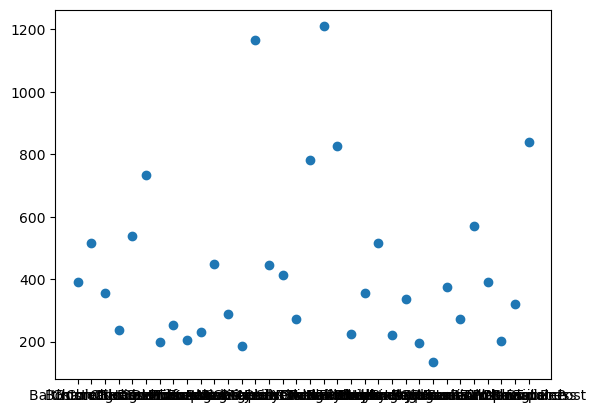

In [32]:
plt.scatter(data1["Newspaper"],data1["daily"])

###### Positive correlation is observed between daily and sunday

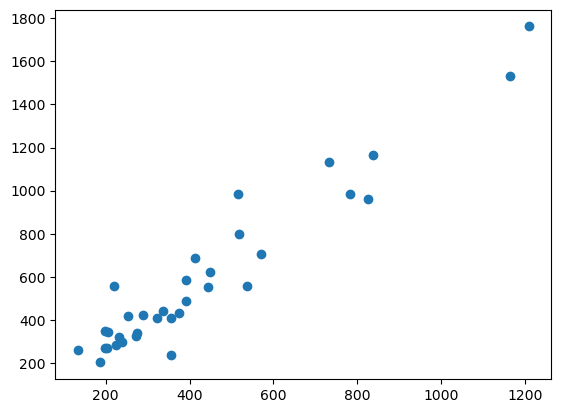

In [33]:
plt.scatter(data1["daily"],data1["sunday"])

AttributeError: Rectangle.set() got an unexpected keyword argument 'state'

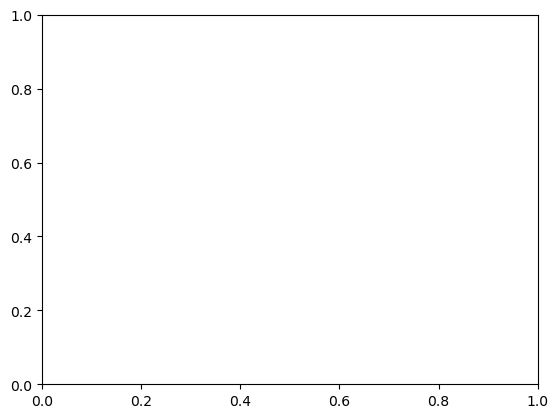

In [34]:
sns.histplot(data1['daily'],kde=True,state='density')
plt.show()

## Observations

#### There are no missing values
#### The daily column values appears to be right-skewed
#### The sunday column values also appear to be right-skewed
#### There are two outliers in both daily column and also in sunday column as observed from the values

## Scatter plot and correlation strength


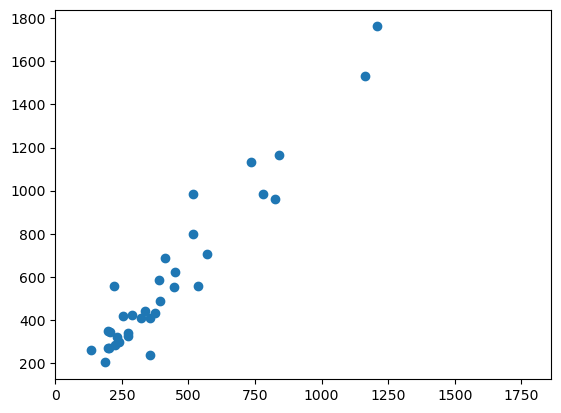

In [35]:
x=data1['daily']
y=data1['sunday']
plt.scatter(data1['daily'],data1['sunday'])
plt.xlim(0,max(x)+100)
plt.xlim(0,max(y)+100)
plt.show()

In [36]:
data1['daily'].corr(data1['sunday'])

0.9581543140785462

In [37]:
data1[['daily','sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [38]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


## Observations

#### The relationship between x(daily) and y(sunday) is seen to bescatter plot linear as seen from  
#### The correlation is stroking and positive with pearson's correlation coefficient of 0.958

### Fit a Linear Regression Model

In [39]:
#Build a regression model
import statsmodels.formula.api as smf
model1=smf.ols('sunday~daily',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        10:53:12   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

#### R-Squared =1-> Perfect fir(all variable explained).
#### R-Squared=0->Model doesnot explain any variance.
#### R-Sqared close to 1-> Good model fit.
#### R-Sqared close to 0-> Poor model fit.

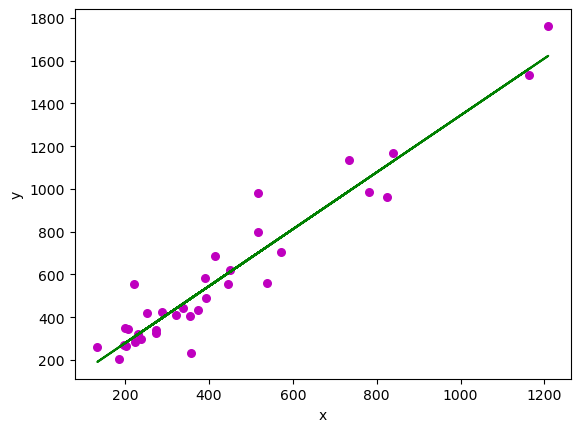

In [40]:
#Plot the scatter plot and overlay the fitted straight line using matplotlib
x=data1['daily'].values
y=data1['sunday'].values
plt.scatter(x,y,color='m',marker='o',s=30)
b0=13.84
b1=1.33
#Predicated response vector
y_hat=b0+b1*x
#Plotting the regression line
plt.plot(x,y_hat,color='g')
#Putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Observations for model summary
##### Probability(p-value) for intercept(beta_0) is 0.707>0.05
##### The intercept coefficient may not be that much significant in prediction
##### The p-value for 'daily'(beta_1) is 0.00<0.05
##### The beta_1 coefficient is highly significant and is contributint to prediction

In [41]:
#Predict the filled the coefficients(Beta-0 and Beta-1)
model1.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [42]:
#Print the model statistics (t and p-Values)
print(f"model t-values:\n{model1.tvalues}\n-------\model p-values: \n{model1.pvalues}")

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-------\model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Harish\AppData\Local\Temp\ipykernel_20744\374799497.py:2: SyntaxWarning: invalid escape sequence '\m'
  print(f"model t-values:\n{model1.tvalues}\n-------\model p-values: \n{model1.pvalues}")


In [43]:
#print the Quality of fitted line(R squares values)
(model1.rsquared,model1.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

### Predict for new data point


In [44]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,1500])

In [45]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [46]:
model1.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [47]:
#Predict all given training data
pred=model1.predict(data1['daily'])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [48]:
#Add predicted values as a column in data1
data1['Y_hat']=pred
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [49]:
#Comput the errors values(residuals) and add as another column
data1['residuals']=data1['sunday']-data1['Y_hat']
data1

,Newspaper,daily,sunday,Y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [50]:
#Compute Mean Squared Error for the model
mse=np.mean((data1['daily']-data1['Y_hat'])**2)
rmse=np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205266
RMSE:  183.83382358002746


## Assumptions in Linear simple linear regression ##
Linearity: The relationship btw the predictors and the response is linear.
Independence: Observations are independent of each other.
Homoscedasticity: The residuals (Y-Y_hat) exhibit constant variance at all levels of the predictor.
Normal Distribution of Errors: The residuals (errors) of the model are normally distributed.

In [54]:
mae=np.mean(np.abs(data1['daily']-data1['Y_hat']))
mae

160.23994117647064

## checking the model residuals scatter plot(for homoscedasticity) ##

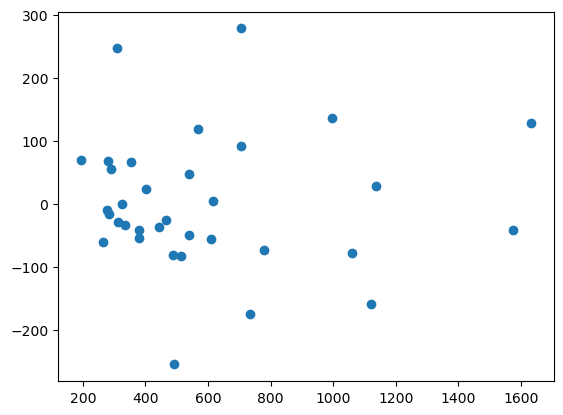

In [55]:
plt.scatter(data1['Y_hat'],data1['residuals'])

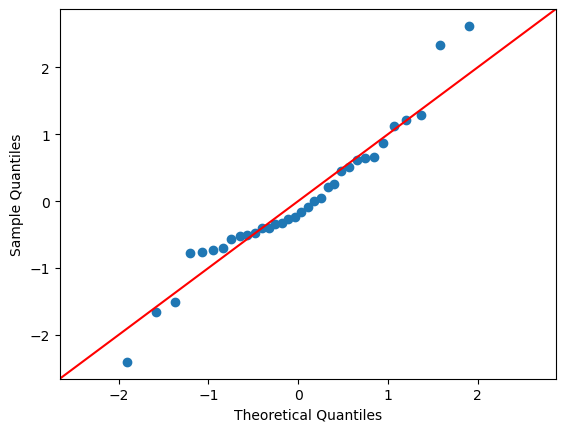

In [59]:
# plot the Q-Q plot (to check the normality of residuals)
import statsmodels.api as sm
sm.qqplot(data1["residuals"],line='45',fit=True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

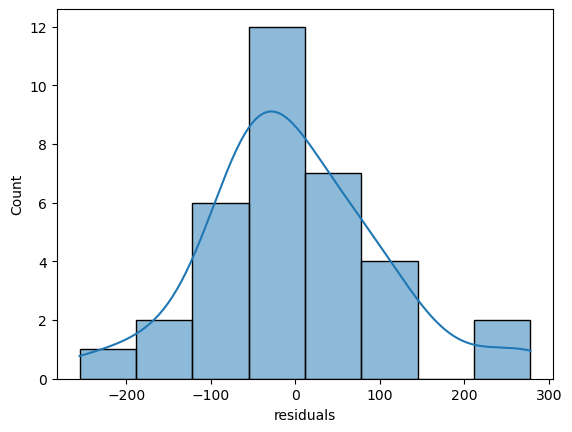

In [62]:
sns.histplot(data1["residuals"], kde =True)